In [224]:
import pandas as pd
from datetime import datetime, timedelta
from os import path
import glob
import matplotlib.pyplot as plt
import numpy as np
import re

In [225]:
date = datetime.today() - timedelta(days = 1)
min_date = datetime(year = 2020, month = 1, day = 22)

data_dir = "data"

while date >= min_date:
    date_formatted = date.strftime("%m-%d-%Y")
    filepath = f"{data_dir}/{date_formatted}.csv"
    if not path.isfile(filepath):    
        url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{date_formatted}.csv"
        dataframe = pd.read_csv(url)
        dataframe.to_csv(filepath, index = False)
        print(f"Saved {filepath}")
    else:
        print(f"Skipped {filepath}")
    date = date - timedelta(days = 1)

Skipped data/03-22-2020.csv
Skipped data/03-21-2020.csv
Skipped data/03-20-2020.csv
Skipped data/03-19-2020.csv
Skipped data/03-18-2020.csv
Skipped data/03-17-2020.csv
Skipped data/03-16-2020.csv
Skipped data/03-15-2020.csv
Skipped data/03-14-2020.csv
Skipped data/03-13-2020.csv
Skipped data/03-12-2020.csv
Skipped data/03-11-2020.csv
Skipped data/03-10-2020.csv
Skipped data/03-09-2020.csv
Skipped data/03-08-2020.csv
Skipped data/03-07-2020.csv
Skipped data/03-06-2020.csv
Skipped data/03-05-2020.csv
Skipped data/03-04-2020.csv
Skipped data/03-03-2020.csv
Skipped data/03-02-2020.csv
Skipped data/03-01-2020.csv
Skipped data/02-29-2020.csv
Skipped data/02-28-2020.csv
Skipped data/02-27-2020.csv
Skipped data/02-26-2020.csv
Skipped data/02-25-2020.csv
Skipped data/02-24-2020.csv
Skipped data/02-23-2020.csv
Skipped data/02-22-2020.csv
Skipped data/02-21-2020.csv
Skipped data/02-20-2020.csv
Skipped data/02-19-2020.csv
Skipped data/02-18-2020.csv
Skipped data/02-17-2020.csv
Skipped data/02-16-2

In [244]:
data_files = glob.glob(f"{data_dir}/*.csv")

daily_dataframes = []
p = re.compile(r'(\d{2}-\d{2}-\d{2})')

for file in data_files:
    daily_dataframe = pd.read_csv(file, parse_dates=[2])
    daily_dataframe["Last Update"] = p.search(file).group()
    daily_dataframes.append(daily_dataframe)

combined_data = pd.concat(daily_dataframes, axis=0, ignore_index=True)
combined_data = combined_data.sort_values(by="Last Update", ascending=False)
combined_data = combined_data.drop(["Longitude", "Latitude"], axis=1)
combined_data["Last Update"] = combined_data["Last Update"].apply(lambda x: datetime.strptime(x, "%m-%d-%y"))
combined_data["Country/Region"] = combined_data["Country/Region"].replace("United Kingdom", "UK")
combined_data["Country/Region"] = combined_data["Country/Region"].replace("Mainland China", "China")

                            Confirmed  Deaths  Recovered
Last Update Country/Region                              
2020-03-13  UK                  801.0     8.0       19.0
2020-03-14  UK                 1143.0    21.0       19.0
2020-03-15  UK                 1144.0    21.0       19.0
2020-03-16  UK                 1551.0    56.0       21.0
2020-03-17  UK                 1960.0    56.0       53.0
2020-03-18  UK                 2642.0    72.0       67.0
2020-03-19  UK                 2716.0   138.0       67.0
2020-03-20  UK                 4014.0   178.0       67.0
2020-03-21  UK                 5067.0   234.0       67.0
2020-03-22  UK                 5741.0   282.0       67.0


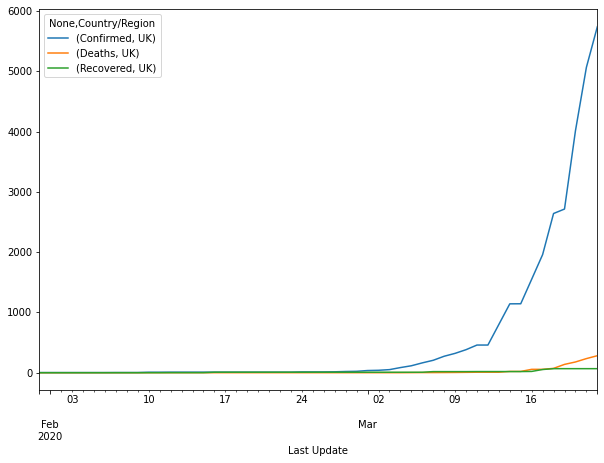

In [247]:
countries_selected = ["UK"]
filtered_data = combined_data[combined_data["Country/Region"].isin(countries_selected)]
grouped_data = filtered_data.groupby(by=["Last Update", "Country/Region"]).sum()
print(grouped_data.tail(10))
fig, ax = plt.subplots(figsize=(10,7))
clean_data = grouped_data.unstack()
clean_data.plot(kind="line", ax=ax)